In [1]:

import json
import jsonlines

# Das (natural language toolkit) müsst ihr bestimmt installieren.
# Weiß noch jemand, wie das geht?
import nltk

# Die collections.Counter package müsst ihr bestimmt auch installieren.
# Die brauchen wir später, um Worte zu zählen.
from collections import Counter



# Hier legen wir fest, welche Daten (Wahlperiode 19 oder 20) wir laden:
legislatur = 19

# Wir generieren eine leere Liste:
alleReden = []

# Wir öffnen den entsprechende File (Dateipfad anpassen!):
with jsonlines.open(f'../../data/speeches_{legislatur}.jsonl') as f:
    for line in f.iter():
    # Wir packen alles Zeile für Zeile zu unserer Liste:
        alleReden.append(line)
        
# Wir sortieren nach Datum:
alleReden.sort(key = lambda x:x['date'])

# Wir lassen uns zeigen, wie viele Reden enthalten sind.
print(f'Die Liste enthält {len(alleReden)} Reden')
# Neue Zeile auf der Konsole:
print(f'\n')





Die Liste enthält 25187 Reden




In [2]:
## Zunächst brauchen wir eine Funktion, die uns die Reden gibt, die ein bestimmtes Wort enthalten. 
#  Funktion für Textsuche: 
#  Gibt eine Untermenge an Reden zurück, die einen bestimmten String (Wort) enthalten.

def find_speeches_with_word(search_term, speeches):
    filtered_speeches = []
    for speech in speeches:
        if ( search_term in speech['text'] ):
            filtered_speeches.append(speech)
    return filtered_speeches


such_wort1 = 'Nachhaltigkeit'
untermenge = find_speeches_with_word(such_wort1,alleReden)
such_wort2 = 'Kapitalismus'
untermenge = find_speeches_with_word(such_wort2,untermenge)
print(len(untermenge))


# Wir lassen uns zeigen, wie viele Reden enthalten sind.
print(f'Diese Liste enthält { len(untermenge) } Reden.')
# Neue Zeile auf der Konsole:
print(f'\n')

3
Diese Liste enthält 3 Reden.




In [3]:
## Reden sind lang und die Worte tauchen in verschiedenen Kontexten auf.
#  Wir würden gerne alle Sätze sehen, in denen der Suchbegriff vorkommt.
#  Aber natürlich kommt unser Suchstring nur in Sätzen vor, die in de Untermenge an Reden sind. 

def find_sentences_with_word(search_term, speeches):
    sents_with_word = []
    for speech in speeches:
        sent_list = nltk.sent_tokenize(speech['text'])
        for sent in sent_list:
            if search_term in sent:
                sents_with_word.append(sent)
    return sents_with_word
                
# Probieren wir diese Funktion einmal aus:
satz_liste = find_sentences_with_word(such_wort2,untermenge)

print(f'Es gibt {len(satz_liste)} Sätze zu {such_wort2}:')
print('\n')

# Wollen wir uns die alle anzeigen lassen? Ja oder Nein?
wir_wollen = False
if wir_wollen:
    for satz in satz_liste:
        print(satz)
        print('\n')


Es gibt 3 Sätze zu Kapitalismus:




In [4]:


## Nun wäre es doch spannend, die Reden einer Partei oder eines Politikers zu sehen.
#  Dazu entwickeln wir eine Funktion, die es erlaubt, in den anderen Felder (keys) zu suchen.
#  Funktion, mit der man eine Menge an Reden nach verschiedenen Kriterien filtern kann.
#  Es wird die entsprechende Untermenge zurückgegeben.
#  'what' enthält den Key, wo gesucht werden soll. Interessant vor allem: 'name' und 'party'

def filter_speeches_for(what, search_term, speeches):
    filtered_speeches = []
    for speech in speeches:
        if search_term in speech[what]:
            filtered_speeches.append(speech)
        
    filtered_speeches.sort(key = lambda x:x['date'])   
    return filtered_speeches

# Beispiel: Für alle Reden von Olaf Scholz:
suche_nach = 'Olaf Scholz'
#suche_nach = 'SPD'
untermenge = filter_speeches_for('name', suche_nach, alleReden)
# Wir lassen uns zeigen, wie viele Reden enthalten sind.
print(f'Diese Liste (Suche nach {suche_nach}) enthält {len(untermenge)} Reden')
print(f'\n')




Diese Liste (Suche nach Olaf Scholz) enthält 183 Reden




In [5]:
## Ich probiere etwas aus

## Ich muss aber wissen, wie die Parteien geschrieben werden!
#for speech in alleReden:
#    print(speech['party'])

such_wort1 = 'Klimawandel'
such_wort2 = 'Klimakrise'

such_wort1 = 'Klima'
such_wort2 = 'Energie'

parties = ['SPD','FDP','CDU','LINKE','GRÜNEN','AfD','unknown'] # sind die richtig geschrieben?

frequencies1 = []
for party in parties:
    untermenge = find_speeches_with_word(such_wort1,alleReden)
    untermenge = filter_speeches_for('party', party, untermenge)
    print(f'Die {party} hat {len(untermenge)} Reden mit "{such_wort1}" gehalten.')
    frequencies1.append(len(untermenge))

print('\n')    
frequencies2 = []
for party in parties:
    untermenge = find_speeches_with_word(such_wort2,alleReden)
    untermenge = filter_speeches_for('party', party, untermenge)
    print(f'Die {party} hat {len(untermenge)} Reden mit "{such_wort2}" gehalten.')
    frequencies2.append(len(untermenge))
    
#print(frequencies1)

Die SPD hat 638 Reden mit "Klima" gehalten.
Die FDP hat 303 Reden mit "Klima" gehalten.
Die CDU hat 860 Reden mit "Klima" gehalten.
Die LINKE hat 379 Reden mit "Klima" gehalten.
Die GRÜNEN hat 609 Reden mit "Klima" gehalten.
Die AfD hat 382 Reden mit "Klima" gehalten.
Die unknown hat 133 Reden mit "Klima" gehalten.


Die SPD hat 431 Reden mit "Energie" gehalten.
Die FDP hat 195 Reden mit "Energie" gehalten.
Die CDU hat 534 Reden mit "Energie" gehalten.
Die LINKE hat 187 Reden mit "Energie" gehalten.
Die GRÜNEN hat 243 Reden mit "Energie" gehalten.
Die AfD hat 337 Reden mit "Energie" gehalten.
Die unknown hat 82 Reden mit "Energie" gehalten.


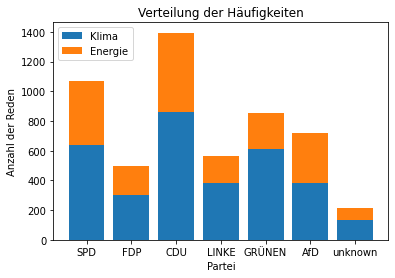

In [6]:

import matplotlib.pyplot as plt

#mpl.rcParams["figure.figsize"] = (8,8)
        
plt.bar(parties,frequencies1,label=f'{such_wort1}')
plt.bar(parties,frequencies2,bottom=frequencies1,label=f'{such_wort2}')
plt.title("Verteilung der Häufigkeiten")
plt.xlabel("Partei")
plt.ylabel("Anzahl der Reden")
plt.legend(loc="upper left")

#plt.hist(freq_array, bins ='auto')
plt.show()

